### Amortizing a Mortgage

First, I'll import some math calculations, which I'll need for the mortage payment:

In [1]:
import numpy as np

And, define a helper function to format currency amounts:

In [2]:
def usd(n):
    return '${:,.0f}'.format(n)

The cashflows of a mortgage are determined by 3 inputs: how much is borrowed, for how long it's borrowed, and how much interest is paid.

From the borrower's perspective, it all starts with the price of the home. Let's assume it's $300,000.

In [3]:
home_price = 300000

The borrower will make a down payment to cover part of this price and borrow the rest. The down payment amount can be as big as the borrower wants to make and as small as the lender is willing to accept. 20% is a typical amount for many loans.

In [4]:
down_payment_percent = 0.2

Once we know how much the borrower is putting down, we can compute the loan amount:

In [5]:
down_payment = home_price * down_payment_percent
loan_amount = home_price - down_payment

In [6]:
print("Home price:      ", usd(home_price))
print("Down payment:    ", usd(down_payment))
print("Amount borrowed: ", usd(loan_amount))

Home price:       $300,000
Down payment:     $60,000
Amount borrowed:  $240,000


This gives us the first important parameter: how much is borrowed.

How long the money will be borrowed is a matter of borrower choice. Longer terms means smaller monthly payments. Most mortgages in the United States have a term of 30 years.

In [7]:
loan_term_in_years = 30

The interest rates depends on multiple factors, including geography, current markets, credit quality, and loan size. Currently, 4% is a reasonable estimate.

In [8]:
annual_interest_rate = 0.04

We now have all 3 three of the important parameters:

In [9]:
print("Amount borrowed:  %s" % usd(loan_amount))
print("How long:         %d years" % loan_term_in_years)
print("Interest rate:    %.1f%%" % (annual_interest_rate * 100))

Amount borrowed:  $240,000
How long:         30 years
Interest rate:    4.0%


Loan terms and interest rates are quoted in years, but the calculations will need to be month-by-month. So, we'll convert and use monthly numbers, from here on.

In [10]:
loan_term_in_months = loan_term_in_years * 12
monthly_interest_rate = annual_interest_rate / 12

The most confusing part of mortgage amortization is understanding the level payment.

Interest is due every month on the entire outstanding balance of the mortgage. E.g. at the beginnging, when none of loan amount has been paid back yet:



Use a standard formula to compute the flat monthly payment. The payment amount is calculated to be the precise amount needed to alway stay current on interest owed and exactly pay off the loan principal at the end of the loan term.

In [11]:
print("Month 1 interest due: %.2lf" % (loan_amount * monthly_interest_rate))

Month 1 interest due: 800.00


That monthly interest declines with the loan amount as principal payments are made.

You might initially think that someone who borrows money for 30-years pays back 1/360 of the loan amount each month. That would result in even principal payments, but interest rate payments would be high at the beginning and low at the end. So, the total payment would decline markedly over time.

To improve affordability, mortgages are instead designed so that the *total* payment each month is the same.

There is a standard formula (implemented in *numpy*) to compute a payment that meets these 3 criteria:
1. Pays off all interest owed every month
2. Pays down the full amount of the loan by the end of the loan term
3. Is the same every month

In [12]:
loan_payment = np.pmt( monthly_interest_rate, loan_term_in_months , -1 * loan_amount)
print("Monthly payment: ", usd(loan_payment))

Monthly payment:  $1,146


In [48]:
starting_principal_balance = loan_amount

print( "%10s" % "Balance", "%10s" % "Payment", "%10s" % "Interest", "%10s" % "Principal" )
print( "%10s" % usd(starting_principal_balance))

interest_due = np.empty(360)
principal_paid = np.empty(360)
principal_balance = np.empty(360)

principal_balance[0] = starting_principal_balance
principal_paid[0] = 0
interest_due[0] = 0



   Balance    Payment   Interest  Principal
  $240,000


In [49]:
for i in range (1, 360):
    interest_due[i] = principal_balance[i-1] * monthly_interest_rate
    principal_paid[i] = loan_payment - interest_due[i]
    principal_balance[i] = principal_balance[i-1] - principal_paid[i]
    
    print( "%10s" % usd(principal_balance[i]), "%10s" % usd(loan_payment), "%10s" % usd(interest_due[i]), "%10s" % usd(principal_paid[i]) )


  $239,654     $1,146       $800       $346
  $239,307     $1,146       $799       $347
  $238,959     $1,146       $798       $348
  $238,610     $1,146       $797       $349
  $238,259     $1,146       $795       $350
  $237,908     $1,146       $794       $352
  $237,555     $1,146       $793       $353
  $237,201     $1,146       $792       $354
  $236,846     $1,146       $791       $355
  $236,490     $1,146       $789       $356
  $236,132     $1,146       $788       $357
  $235,774     $1,146       $787       $359
  $235,414     $1,146       $786       $360
  $235,053     $1,146       $785       $361
  $234,690     $1,146       $784       $362
  $234,327     $1,146       $782       $363
  $233,962     $1,146       $781       $365
  $233,596     $1,146       $780       $366
  $233,229     $1,146       $779       $367
  $232,861     $1,146       $777       $368
  $232,491     $1,146       $776       $370
  $232,120     $1,146       $775       $371
  $231,748     $1,146       $774

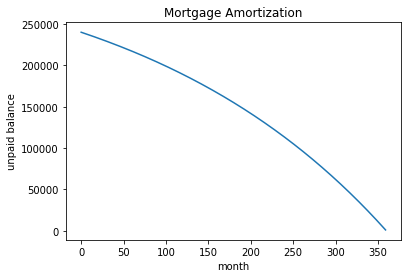

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure()
bal_line = fig.add_subplot(111)

bal_line.plot( list(range(360)), principal_balance)

bal_line.set(xlabel='month', ylabel='unpaid balance',
       title='Mortgage Amortization')

plt.show()


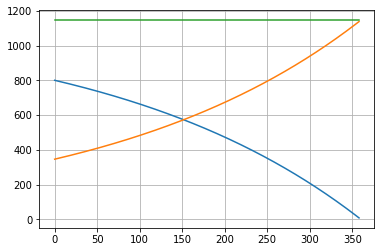

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = list(range(359))
s = principal_balance

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
# ax.plot(t, principal_balance)
ax.plot(t, interest_due[1:])
ax.plot(t, principal_paid[1:])
ax.plot(t, interest_due[1:] + principal_paid[1:])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()


In [64]:
principal_paid

array([    0.        ,   345.79670912,   346.94936481,   348.1058627 ,
         349.26621557,   350.43043629,   351.59853775,   352.77053287,
         353.94643465,   355.1262561 ,   356.31001028,   357.49771032,
         358.68936935,   359.88500058,   361.08461725,   362.28823264,
         363.49586008,   364.70751295,   365.92320466,   367.14294868,
         368.36675851,   369.5946477 ,   370.82662986,   372.06271863,
         373.30292769,   374.54727078,   375.79576168,   377.04841422,
         378.30524227,   379.56625974,   380.83148061,   382.10091888,
         383.37458861,   384.6525039 ,   385.93467892,   387.22112785,
         388.51186494,   389.80690449,   391.10626084,   392.40994837,
         393.71798153,   395.03037481,   396.34714272,   397.66829986,
         398.99386086,   400.3238404 ,   401.6582532 ,   402.99711405,
         404.34043776,   405.68823922,   407.04053335,   408.39733513,
         409.75865958,   411.12452178,   412.49493685,   413.86991997,
      